# TITANIC SURVIVAL PREDICTION

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
df=pd.read_csv('tested.csv')
df.head()
df.isnull().sum()
#df.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [51]:
df['Age']=df['Age'].fillna(df['Age'].mean)
df['Fare']=df['Fare'].fillna(df['Fare'].mean)

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [53]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

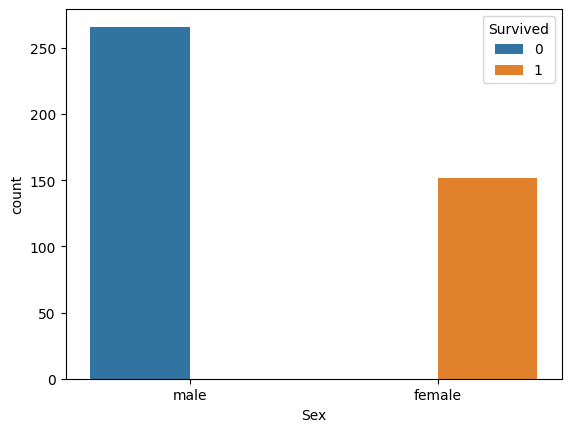

In [54]:
#sns.countplot(x='Survived',data=df)
sns.countplot(x='Sex',data=df,hue='Survived')

In [55]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [56]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [57]:
#sns.displot(x='Age',data=df)
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

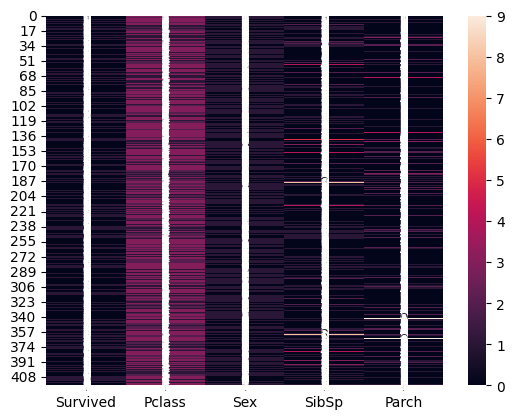

In [78]:
df2=df.drop(['Name'], axis='columns')
sns.heatmap(data=df2,annot=True)
plt.show()

In [59]:
# drop the 'Age','PassengerId','Ticket','Fare','Embarked'

df.drop(['Age','PassengerId','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [60]:
df.drop(['Cabin'],axis=1,inplace=True)

In [61]:
df.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
SibSp        int64
Parch        int64
dtype: object

In [62]:
#Lable emncoding the Sex to 0 1 

from sklearn import preprocessing

LE= preprocessing.LabelEncoder()

df['Sex']=LE.fit_transform(df['Sex'])

In [63]:
df.dtypes
df.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [64]:
#split the data set 

X= df[['Pclass', 'Sex', 'SibSp', 'Parch']]
y= df['Survived']

In [65]:
#Apply the traing and testing
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                   X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [66]:
#import and train  logistic regression on data set

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train) 

LogisticRegression()

In [67]:
#predict the test 
predict=lr.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        26

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

